In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
df = pd.read_csv("train.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#handle numerical data
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#handle categorical data
df['Gender'].mode()[0]

'Male'

In [12]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

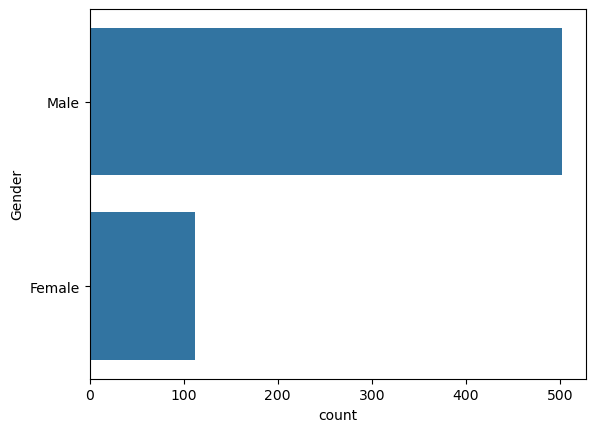

In [14]:
sns.countplot(df['Gender'])

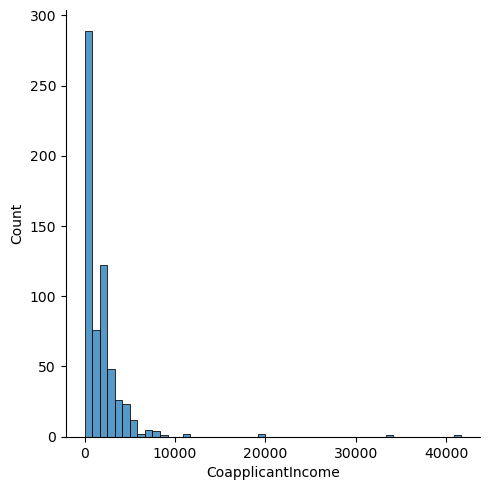

In [15]:
sns.displot(df.CoapplicantIncome)

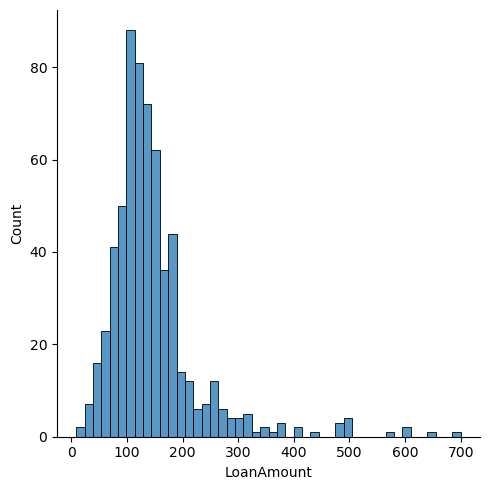

In [16]:
sns.displot(df.LoanAmount)

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
df['total_income']=df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


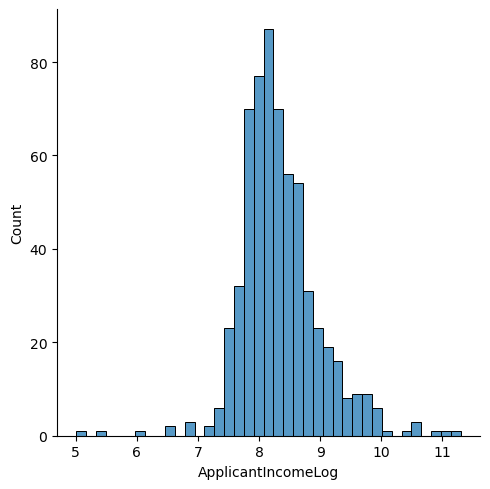

In [19]:
df['ApplicantIncomeLog']=np.log(df['ApplicantIncome'])
sns.displot(df.ApplicantIncomeLog)

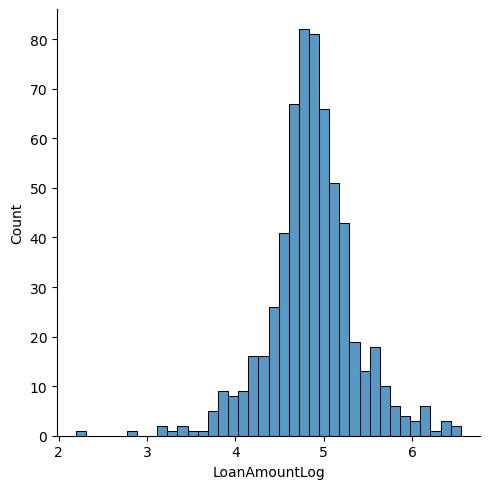

In [20]:
df['LoanAmountLog']=np.log(df['LoanAmount'])
sns.displot(df.LoanAmountLog)

c:\Users\nandi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


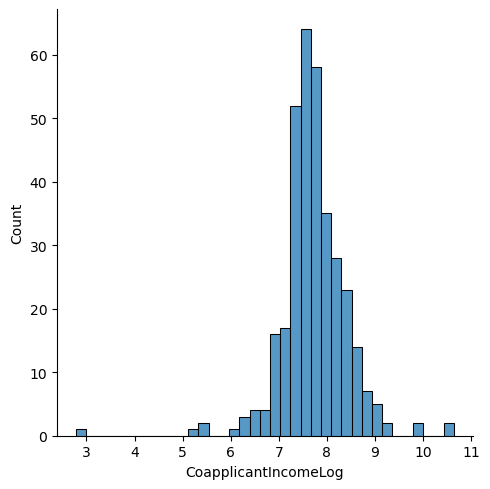

In [21]:
df['CoapplicantIncomeLog']=np.log(df['CoapplicantIncome'])
sns.displot(df.CoapplicantIncomeLog)

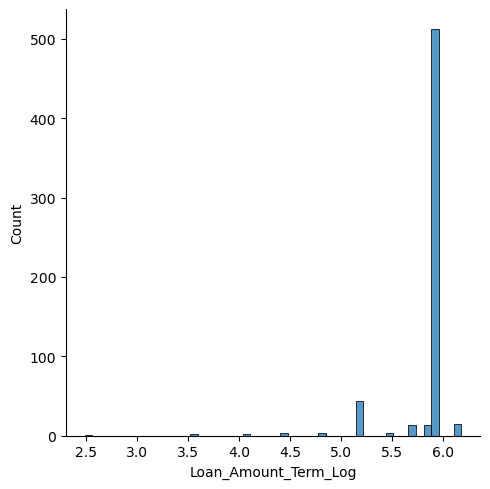

In [22]:
df['Loan_Amount_Term_Log']=np.log(df['Loan_Amount_Term'])
sns.displot(df.Loan_Amount_Term_Log)

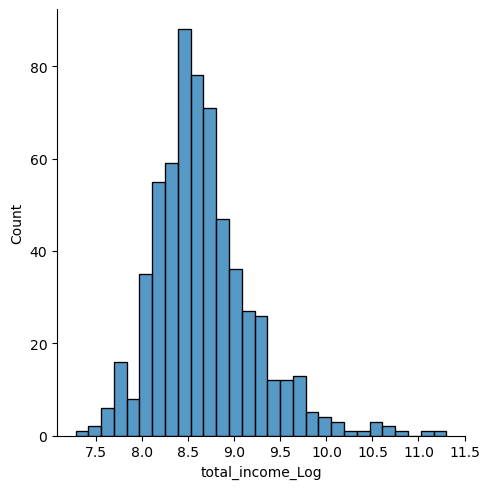

In [23]:
df['total_income_Log']=np.log(df['total_income'])
sns.displot(df.total_income_Log)

In [24]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_income', 'ApplicantIncomeLog', 'LoanAmountLog',
       'CoapplicantIncomeLog', 'Loan_Amount_Term_Log', 'total_income_Log'],
      dtype='object')

In [25]:
cols1= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','total_income','Loan_ID','CoapplicantIncomeLog']

df =df.drop(columns=cols1,axis=1)


In [26]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,total_income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [27]:
df.Gender.value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [28]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [29]:
#handling categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  total_income_Log      614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [30]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncomeLog',
       'LoanAmountLog', 'Loan_Amount_Term_Log', 'total_income_Log'],
      dtype='object')

In [31]:
cols2 = [
    'Gender','Married','Education','Self_Employed',
    'Property_Area','Loan_Status','Dependents'
]

df = pd.get_dummies(
    df,
    columns=cols2,
    drop_first=True
)


In [32]:
df.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,total_income_Log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
0,1.0,8.674026,4.986426,5.886104,8.674026,True,False,False,False,False,True,True,False,False,False
1,1.0,8.430109,4.852030,5.886104,8.714568,True,True,False,False,False,False,False,True,False,False
2,1.0,8.006368,4.189655,5.886104,8.006368,True,True,False,True,False,True,True,False,False,False
3,1.0,7.856707,4.787492,5.886104,8.505323,True,True,True,False,False,True,True,False,False,False
4,1.0,8.699515,4.948760,5.886104,8.699515,True,False,False,False,False,True,True,False,False,False


In [33]:
df.columns

Index(['Credit_History', 'ApplicantIncomeLog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'total_income_Log', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y',
       'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [34]:
df = df.rename(columns={
    'Gender_True': 'Gender_Male',
    'Married_True': 'Married_Yes',
    'Education_True': 'Education_NotGraduate',
    'Self_Employed_True': 'Self_Employed_Yes'
})


In [35]:
df.columns

Index(['Credit_History', 'ApplicantIncomeLog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'total_income_Log', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y',
       'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [36]:
cols_binary = [
    'Gender_Male',
    'Married_Yes',
    'Education_Not Graduate',
    'Self_Employed_Yes',
    'Property_Area_Semiurban',
    'Property_Area_Urban',
    'Loan_Status_Y',
    'Dependents_1',
    'Dependents_2',
    'Dependents_3+'
]

df[cols_binary] = df[cols_binary].astype(int)



In [37]:
df.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,total_income_Log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
0,1.0,8.674026,4.986426,5.886104,8.674026,1,0,0,0,0,1,1,0,0,0
1,1.0,8.430109,4.852030,5.886104,8.714568,1,1,0,0,0,0,0,1,0,0
2,1.0,8.006368,4.189655,5.886104,8.006368,1,1,0,1,0,1,1,0,0,0
3,1.0,7.856707,4.787492,5.886104,8.505323,1,1,1,0,0,1,1,0,0,0
4,1.0,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,1,1,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           614 non-null    float64
 1   ApplicantIncomeLog       614 non-null    float64
 2   LoanAmountLog            614 non-null    float64
 3   Loan_Amount_Term_Log     614 non-null    float64
 4   total_income_Log         614 non-null    float64
 5   Gender_Male              614 non-null    int64  
 6   Married_Yes              614 non-null    int64  
 7   Education_Not Graduate   614 non-null    int64  
 8   Self_Employed_Yes        614 non-null    int64  
 9   Property_Area_Semiurban  614 non-null    int64  
 10  Property_Area_Urban      614 non-null    int64  
 11  Loan_Status_Y            614 non-null    int64  
 12  Dependents_1             614 non-null    int64  
 13  Dependents_2             614 non-null    int64  
 14  Dependents_3+            6

In [39]:
test = pd.read_csv("test.csv")

#filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

#filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income']= test['ApplicantIncome']+test['CoapplicantIncome']

#apply log transformation to the attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])
test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])
test['LoanAmountLog'] = np.log(test['LoanAmount'])
test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])
test['Total_income_Log'] = np.log(test['Total_income'])



c:\Users\nandi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\nandi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
cols1= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','Loan_ID','CoapplicantIncomeLog']

test =test.drop(columns=cols1,axis=1)


In [41]:
cols2 = [
    'Gender','Married','Education','Self_Employed',
    'Property_Area','Dependents'
]

test= pd.get_dummies(
    test,
    columns=cols2,
    drop_first=True
)


In [42]:
df.columns

Index(['Credit_History', 'ApplicantIncomeLog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'total_income_Log', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y',
       'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [43]:
print(test.columns.tolist())


['Credit_History', 'ApplicantIncomeLog', 'LoanAmountLog', 'Loan_Amount_Term_Log', 'Total_income_Log', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Dependents_1', 'Dependents_2', 'Dependents_3+']


In [44]:
cols_binary = [
    'Gender_Male',
    'Married_Yes',
    'Education_Not Graduate',
    'Self_Employed_Yes',
    'Property_Area_Semiurban',
    'Property_Area_Urban',
    'Dependents_1',
    'Dependents_2',
    'Dependents_3+'
]

test[cols_binary] = test[cols_binary].astype(int)


In [45]:
test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,1.000000,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,1,0,0,0
1,1.000000,8.031385,4.836282,5.886104,8.428581,1,1,0,0,0,1,1,0,0
2,1.000000,8.517193,5.337538,5.886104,8.824678,1,1,0,0,0,1,0,1,0
3,0.825444,7.757906,4.605170,5.886104,8.494129,1,1,0,0,0,1,0,1,0
4,1.000000,8.094378,4.356709,5.886104,8.094378,1,0,1,0,0,1,0,0,0


In [46]:
from sklearn.model_selection import train_test_split

# Features & target
X = df.drop(columns=['Loan_Status_Y'])
y = df['Loan_Status_Y']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status_Y, Length: 123, dtype: int64

In [49]:
# model_training
#Random_Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
print('Accuracy is: ',model.score(X_test,y_test)*100)

Accuracy is:  82.92682926829268


In [51]:
#Deccision_Tree
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train, y_train)
print('Accuracy is: ',model.score(X_test,y_test)*100)

Accuracy is:  82.92682926829268


In [52]:
#logistic_regression
from sklearn.linear_model import LogisticRegression
model3= LogisticRegression()
model3.fit(X_train, y_train)
print('Accuracy is: ',model.score(X_test,y_test)*100)

Accuracy is:  82.92682926829268


In [53]:
#confusion_matrics
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[23, 15],
       [ 6, 79]])

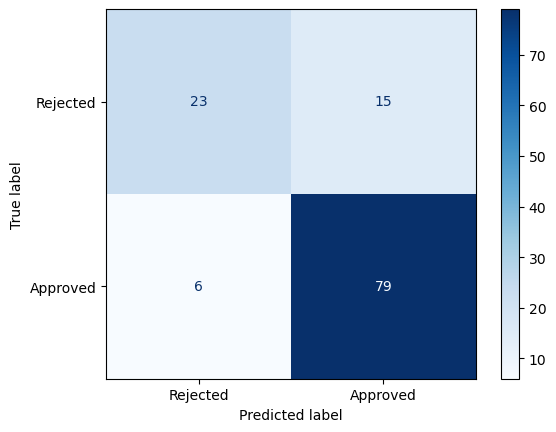

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Rejected', 'Approved']
)

disp.plot(cmap='Blues')
plt.show()


In [55]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [56]:
import pickle

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

print(model)


RandomForestClassifier()
